In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling 

# 전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터 분할
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

# 모델링
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm

# 평가지표
from sklearn.metrics import accuracy_score, mean_squared_error

In [81]:
import warnings

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
respec = pd.read_csv('/content/drive/MyDrive/dataset/respec_1.csv')

- yealy_income :
 left-skewed -> log변환

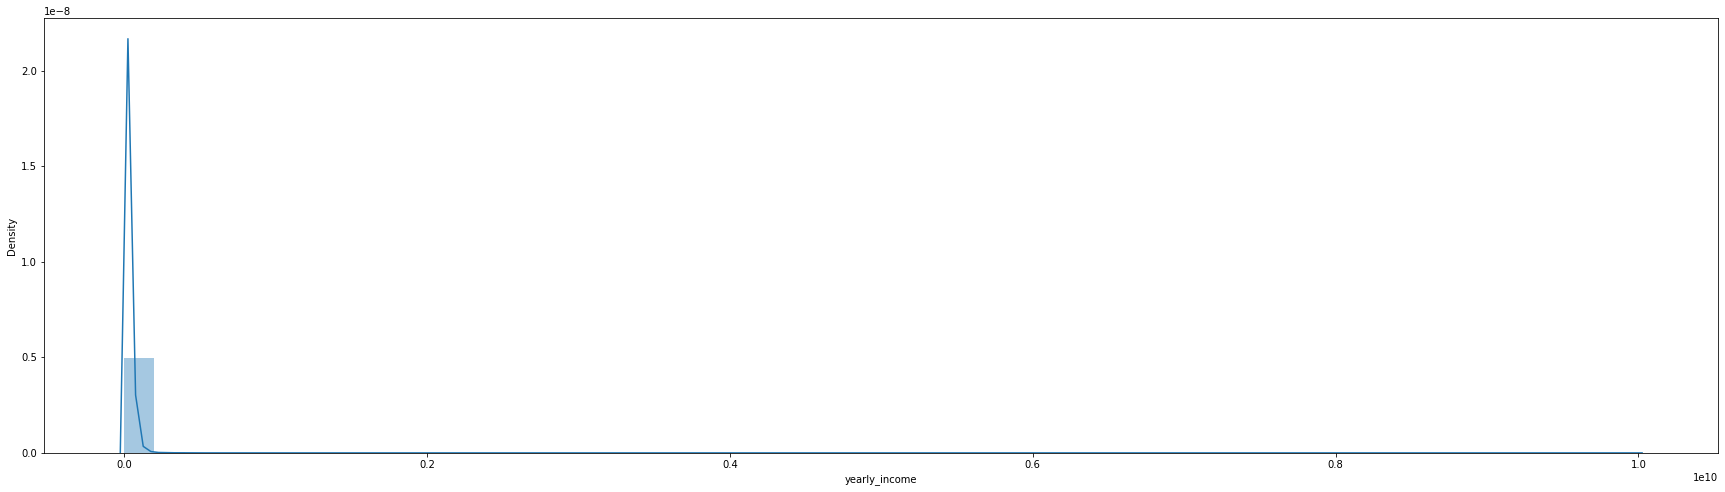

In [84]:
plt.figure(figsize=(30,8))
sns.distplot(respec['yearly_income'])
plt.show()

In [85]:
respec['yearly_income']=np.log(respec['yearly_income'])

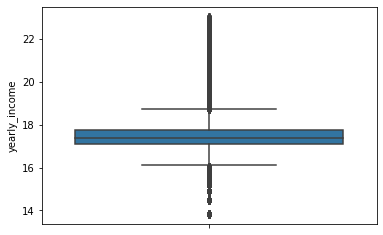

In [86]:
sns.boxplot(y= respec["yearly_income"])

desired_amount도 left-skewed되어있음

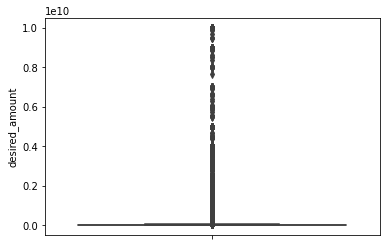

In [87]:
sns.boxplot(y= respec["desired_amount"])

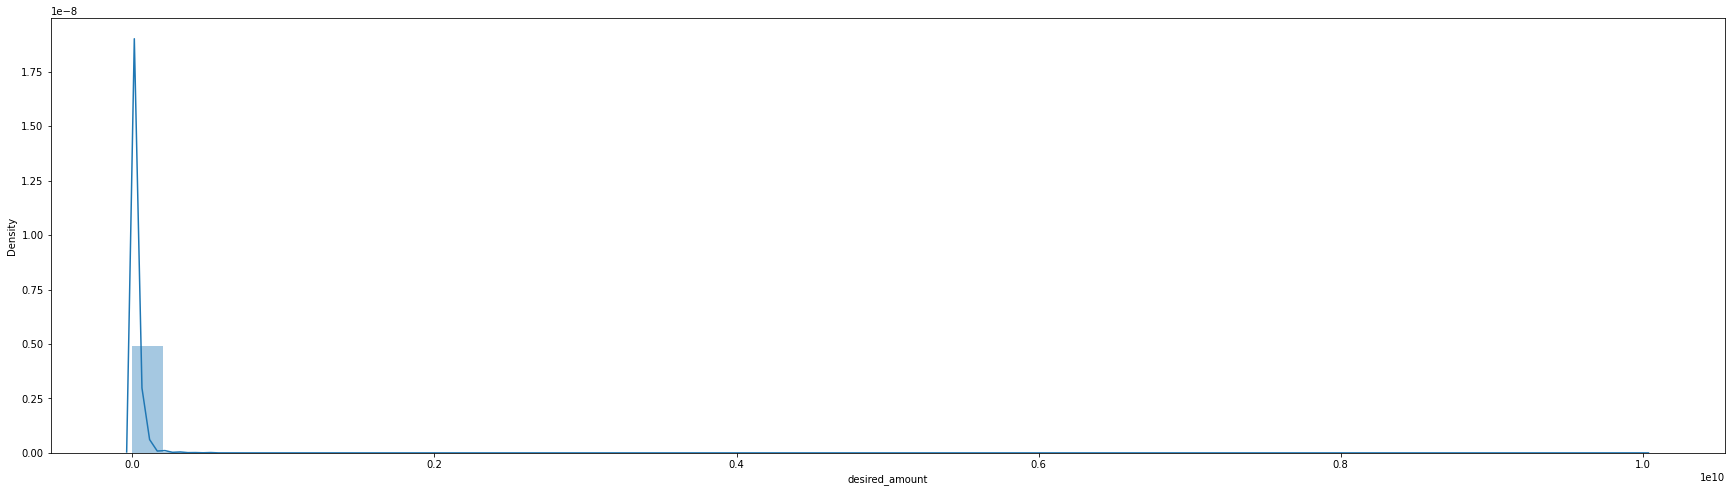

In [88]:
plt.figure(figsize=(30,8))
sns.distplot(respec["desired_amount"])
plt.show()

In [89]:
respec["desired_amount"]=np.log(respec["desired_amount"])

In [90]:
respec

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,work_year
0,954900,553686,1.0,2022-06-07 14:29:03,870.0,17.216708,PRIVATEBUSINESS,정규직,기타가족소유,17.216708,SWITCHLOAN,0.0,1.0,1.0,27000000.0,50.0,16.0
1,137274,59516,1.0,2022-06-07 21:40:22,710.0,17.216708,FREELANCER,기타,기타가족소유,16.118096,LIVING,1.0,1.0,5.0,15000000.0,20.0,2.0
2,1570936,167320,1.0,2022-06-07 09:40:27,820.0,17.942645,EARNEDINCOME,정규직,자가,14.508658,LIVING,1.0,1.0,7.0,344000000.0,30.0,6.0
3,967833,33400,1.0,2022-06-07 08:55:07,630.0,17.399029,EARNEDINCOME,정규직,기타가족소유,15.424948,LIVING,0.0,0.0,1.0,16000000.0,20.0,2.0
4,1614045,860410,1.0,2022-06-07 11:29:05,590.0,17.622173,OTHERINCOME,기타,자가,16.523561,SWITCHLOAN,1.0,0.0,1.0,20000000.0,40.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968748,1864587,489900,1.0,2022-03-22 14:55:32,590.0,17.034386,FREELANCER,기타,기타가족소유,15.424948,BUSINESS,0.0,0.0,0.0,0.0,20.0,2.0
968749,1327066,151422,1.0,2022-03-22 01:19:24,980.0,16.811243,OTHERINCOME,기타,자가,17.727534,LIVING,0.0,1.0,1.0,43500000.0,60.0,6.0
968750,1319606,173524,1.0,2022-03-22 07:34:32,750.0,18.132999,EARNEDINCOME,정규직,자가,18.420681,SWITCHLOAN,1.0,1.0,8.0,200000000.0,40.0,14.0
968751,1482466,766546,1.0,2022-03-22 22:12:35,640.0,17.727534,EARNEDINCOME,정규직,자가,16.118096,SWITCHLOAN,0.0,1.0,10.0,117000000.0,40.0,6.0


existing_loan_amt log변환

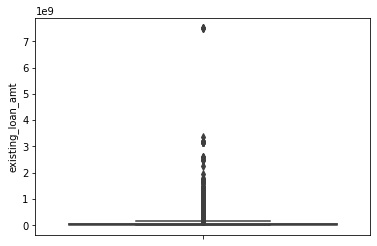

In [91]:
sns.boxplot(y= respec["existing_loan_amt"])

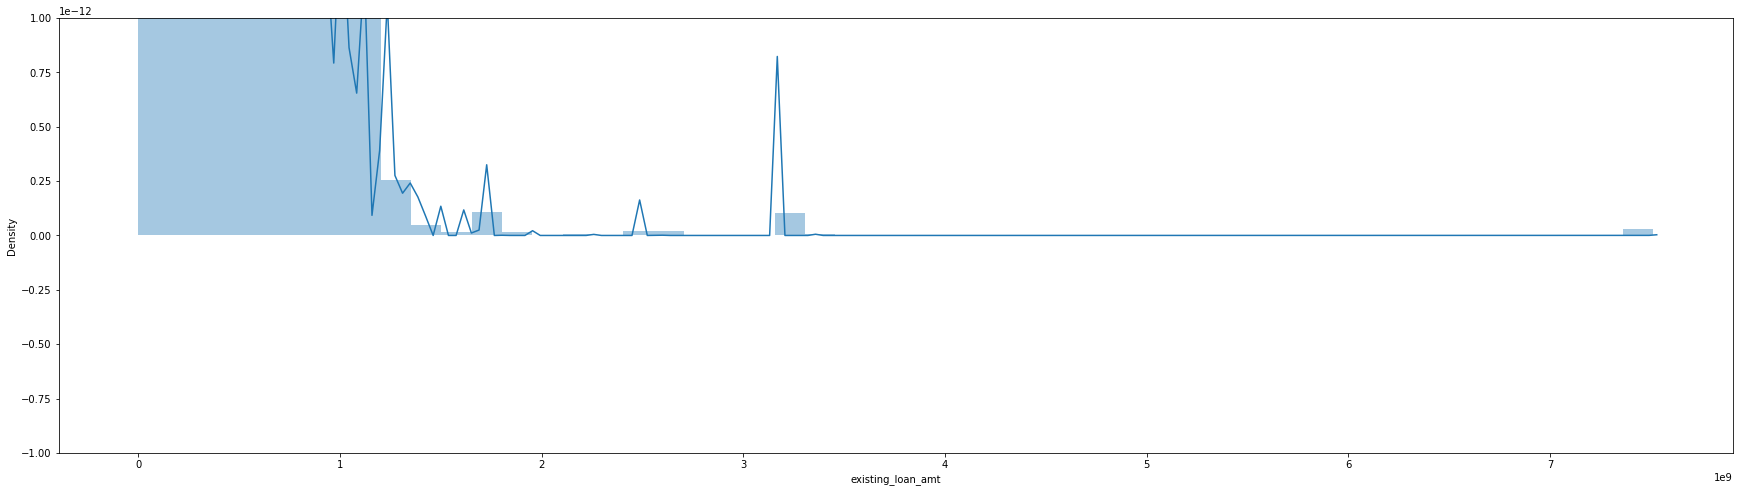

In [92]:
plt.figure(figsize=(30,8))
sns.distplot(respec["existing_loan_amt"])
plt.show()

In [93]:
respec["existing_loan_amt"]=np.log(respec["existing_loan_amt"])

In [94]:
respec["existing_loan_amt"]=np.log(respec["existing_loan_amt"])

모델링 전 전처리

In [95]:
respec['gender'] = pd.Categorical(respec.gender)
respec.dtypes

application_id                            int64
user_id                                   int64
gender                                 category
insert_time                              object
credit_score                            float64
yearly_income                           float64
income_type                              object
employment_type                          object
houseown_type                            object
desired_amount                          float64
purpose                                  object
personal_rehabilitation_yn              float64
personal_rehabilitation_complete_yn     float64
existing_loan_cnt                       float64
existing_loan_amt                       float64
reage                                   float64
work_year                               float64
dtype: object

In [96]:
respec['personal_rehabilitation_yn'] = pd.Categorical(respec.personal_rehabilitation_yn)
respec.dtypes

application_id                            int64
user_id                                   int64
gender                                 category
insert_time                              object
credit_score                            float64
yearly_income                           float64
income_type                              object
employment_type                          object
houseown_type                            object
desired_amount                          float64
purpose                                  object
personal_rehabilitation_yn             category
personal_rehabilitation_complete_yn     float64
existing_loan_cnt                       float64
existing_loan_amt                       float64
reage                                   float64
work_year                               float64
dtype: object

In [97]:
respec['personal_rehabilitation_complete_yn'] = pd.Categorical(respec.personal_rehabilitation_complete_yn)
respec.dtypes

application_id                            int64
user_id                                   int64
gender                                 category
insert_time                              object
credit_score                            float64
yearly_income                           float64
income_type                              object
employment_type                          object
houseown_type                            object
desired_amount                          float64
purpose                                  object
personal_rehabilitation_yn             category
personal_rehabilitation_complete_yn    category
existing_loan_cnt                       float64
existing_loan_amt                       float64
reage                                   float64
work_year                               float64
dtype: object

In [98]:
respec.to_csv(('/content/drive/MyDrive/dataset/respec_2.csv'))

In [99]:
respec = respec.drop(['application_id', 'user_id', 'insert_time'], axis = 1)

In [100]:
respec.loc[respec['credit_score'] < 449, 'credit_label'] = 10
respec.loc[(respec['credit_score'] >= 450) & (respec['credit_score'] <540), 'credit_label'] = 9
respec.loc[(respec['credit_score'] >= 540) & (respec['credit_score'] <600), 'credit_label'] = 8
respec.loc[(respec['credit_score'] >= 600) & (respec['credit_score'] <670), 'credit_label'] = 7
respec.loc[(respec['credit_score'] >= 670) & (respec['credit_score'] <730), 'credit_label'] = 6
respec.loc[(respec['credit_score'] >= 730) & (respec['credit_score'] <770), 'credit_label'] = 5
respec.loc[(respec['credit_score'] >= 770) & (respec['credit_score'] <800), 'credit_label'] = 4
respec.loc[(respec['credit_score'] >= 800) & (respec['credit_score'] <860), 'credit_label'] = 3
respec.loc[(respec['credit_score'] >= 860) & (respec['credit_score'] <910), 'credit_label'] = 2
respec.loc[respec['credit_score'] >= 910, 'credit_label'] = 1

In [101]:
respec = respec.drop(['credit_score'],axis=1)

In [102]:
respec['employment_type'] = respec['employment_type'].replace("기타", 'ETC').replace("정규직", 'Permanent').replace("계약직", 'Temporary').replace("일용직", "Daily")

In [103]:
respec['houseown_type'] = respec['houseown_type'].replace("자가", 'Own').replace("배우자", 'Spouse').replace("전월세", 'Rent').replace("기타가족소유", "Family")

In [104]:
respec['personal_rehabilitation_yn'] = respec['personal_rehabilitation_yn'].astype('str')

In [105]:
respec['personal_rehabilitation_complete_yn'] = respec['personal_rehabilitation_complete_yn'].astype('str')

In [106]:
respec['gender'] = respec['gender'].astype('str')

In [107]:
respec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968753 entries, 0 to 968752
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   gender                               968753 non-null  object 
 1   yearly_income                        968753 non-null  float64
 2   income_type                          968753 non-null  object 
 3   employment_type                      968753 non-null  object 
 4   houseown_type                        968753 non-null  object 
 5   desired_amount                       968753 non-null  float64
 6   purpose                              968753 non-null  object 
 7   personal_rehabilitation_yn           968753 non-null  object 
 8   personal_rehabilitation_complete_yn  968753 non-null  object 
 9   existing_loan_cnt                    968753 non-null  float64
 10  existing_loan_amt                    818593 non-null  float64
 11  reage        

In [108]:
respec_train = respec[respec['credit_label'].notnull()]
respec_train

,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,work_year,credit_label
0,1.0,17.216708,PRIVATEBUSINESS,Permanent,Family,17.216708,SWITCHLOAN,0.0,1.0,1.0,2.839742,50.0,16.0,2.0
1,1.0,17.216708,FREELANCER,ETC,Family,16.118096,LIVING,1.0,1.0,5.0,2.804787,20.0,2.0,6.0
2,1.0,17.942645,EARNEDINCOME,Permanent,Own,14.508658,LIVING,1.0,1.0,7.0,2.978390,30.0,6.0,3.0
3,1.0,17.399029,EARNEDINCOME,Permanent,Family,15.424948,LIVING,0.0,0.0,1.0,2.808686,20.0,2.0,7.0
4,1.0,17.622173,OTHERINCOME,ETC,Own,16.523561,SWITCHLOAN,1.0,0.0,1.0,2.822048,40.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968747,1.0,17.909855,PRIVATEBUSINESS,Permanent,Rent,16.523561,BUSINESS,0.0,1.0,1.0,2.867232,20.0,2.0,5.0
968748,1.0,17.034386,FREELANCER,ETC,Family,15.424948,BUSINESS,0.0,0.0,0.0,NaN,20.0,2.0,8.0
968749,1.0,16.811243,OTHERINCOME,ETC,Own,17.727534,LIVING,0.0,1.0,1.0,2.867232,60.0,6.0,1.0
968750,1.0,18.132999,EARNEDINCOME,Permanent,Own,18.420681,SWITCHLOAN,1.0,1.0,8.0,2.950412,40.0,14.0,5.0


In [109]:
respec_test = respec[respec['credit_label'].isnull()]
respec_test

,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,work_year,credit_label
15,1.0,16.906553,EARNEDINCOME,Permanent,Rent,16.906553,SWITCHLOAN,0.0,0.0,0.0,NaN,40.0,14.0,NaN
25,1.0,17.622173,OTHERINCOME,ETC,Rent,17.216708,BUSINESS,0.0,0.0,1.0,2.867232,40.0,6.0,NaN
41,0.0,17.686712,EARNEDINCOME,Permanent,Own,19.450300,BUYHOUSE,1.0,0.0,0.0,NaN,30.0,11.0,NaN
46,0.0,18.683045,PRIVATEBUSINESS,Permanent,Own,17.504390,LIVING,0.0,0.0,4.0,2.869158,40.0,4.0,NaN
48,0.0,16.300417,EARNEDINCOME,Temporary,Own,16.118096,LIVING,0.0,0.0,0.0,NaN,40.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968626,1.0,17.644152,EARNEDINCOME,Permanent,Family,17.727534,LIVING,1.0,0.0,0.0,NaN,50.0,1.0,NaN
968671,1.0,17.312018,EARNEDINCOME,Permanent,Family,17.216708,SWITCHLOAN,1.0,0.0,0.0,NaN,30.0,4.0,NaN
968684,1.0,17.216708,EARNEDINCOME,Permanent,Rent,16.118096,LIVING,0.0,0.0,0.0,NaN,30.0,5.0,NaN
968696,1.0,17.599700,EARNEDINCOME,Permanent,Rent,16.811243,ETC,1.0,0.0,0.0,NaN,30.0,5.0,NaN


In [110]:
le = LabelEncoder()
le

LabelEncoder()

In [111]:
credit_label = respec['credit_label']
credit_label.unique()

array([ 2.,  6.,  3.,  7.,  8.,  5.,  9.,  1., nan,  4., 10.])

In [112]:
respec_train = pd.get_dummies(respec_train)
respec_test= pd.get_dummies(respec_test)

In [113]:
respec.to_csv(('/content/drive/MyDrive/dataset/respec_2.csv'))

파라미터 튜닝

In [114]:
params = {'learning_rate': 0.01, 
          'max_depth': -1, 
          'boosting': 'gbdt', 
          'objective': 'multiclass', 
          'metric': 'multi_logloss', 
          'is_training_metric': True, 
          'num_leaves': 144, #
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2022}

In [115]:
X_train = respec_train.drop('credit_label',axis=1)
y_train = respec_train['credit_label']

In [116]:
import lightgbm as lgb
warnings.filterwarnings('ignore')

In [117]:
train_ds=lgb.Dataset(X_train,label=y_train)

In [118]:
y_train

0         2.0
1         6.0
2         3.0
3         7.0
4         8.0
         ... 
968747    5.0
968748    8.0
968749    1.0
968750    5.0
968751    7.0
Name: credit_label, Length: 886984, dtype: float64

In [119]:
model=lgb.train(params,train_ds,1000,verbose_eval=50)

LightGBMError: ignored